# Perceptron monocapa

Un perceptrón monocapa está compuesto de una capa pasiva de entrada, y una sola capa activa que también sirve de capa de salida.

El input de un perceptron determina el estado de las neuronas pasivas de la capa de entrada, $x$.
Se considera, además, una neurona pasiva de estado fijo $x_{n_e}=-1$, para que haga las veces de umbral de activación.
Ante una entrada $x$, la salida de la red neuronal viene dada por
$$
y_j(x)
=
g(h_{j}(x))
$$
donde
$$
h_j
=
%\sum_{i=1}^{n_e}
\sum_i
w_{ji}x_i
$$
para $j=1,...,n_s$, y $g$ es una función de activación.
Por ejemplo, una ReLU, la cual viene dada por
$g(h) = h$ si $h>0$ y $g(h)=0$ si $h\leq 0$.

Para entrenar la red, usamos como función costo el error cuadrático sobre el conjunto de entrenamiento $\{e_m,s_m:m=1,...,M\}$, al cuál lo expresamos como una función de $w$
$$
E(w)
=
\frac{1}{2}
%\sum_{m=1}^M
\sum_{m}
%\sum_{j=1}^{n_s}
\sum_{j}
(y_{jm}(w)-s_{mj})^2
$$
donde $s_{mj}$ es la salida deseada en la $j$-ésima neurona ante el $m$-ésimo ejemplo, $y_{mj}$ es la salida obtenida en la $j$-esima neurona ante el $m$-ésimo ejemplo, y $n_s$ es el número de neuronas de salida.
Por otro lado,
$$
y_{jm}(w)
=
g(h_{jm}(w))
$$
donde
$$
h_{jm}(w)
=
\sum_{i=0}^{n_e}
w_{ji}e_{mi}
$$
Nos interesa calcular el gradiente de $E(w)$
$$
\frac{\partial E}{\partial w_{pq}}
=
\sum_m
\sum_j
(y_{jm}(w)-s_{mj})
\frac{\partial y_{jm}}{\partial w_{pq}}
$$
$$
=
\sum_m
\sum_j
(y_{jm}(w)-s_{mj})
g'(h_{jm}(w))
\frac{\partial h_{jm}}{\partial w_{pq}}
$$
$$
=
\sum_m
\sum_j
(y_{jm}(w)-s_{mj})
g'(h_{jm}(w))
\delta_{jp}
e_{mq}
$$
$$
=
\sum_m
(y_{pm}(w)-s_{mp})
g'(h_{pm}(w))
e_{mq}
$$
puesto que
$$
\frac{\partial h_{jm}}{\partial w_{pq}}
=
%\sum_{i=1}^{n_e}
\sum_i
\frac{w_{ji}}{w_{pq}}
e_{mi}
=
%\sum_{i=1}^{n_e}
\sum_i
\delta_{jp}
\delta_{iq}
e_{mi}
=
\delta_{jp}
e_{mq}
$$

Recordar que, en el caso de una ReLU, $g'(h)=\Theta(h)$, donde $\Theta(h)=1$ si $h>0$ y $\Theta(h)=0$ si $h\leq 0$.

Para actualizar los pesos sinápticos en la $(\tau+1)$-ésima época de entrenamiento, utilice la regla
$$
w^{\tau}_{ji} \to w^{\tau+1}_{ji} = w^{\tau}_{ji} - \eta \frac{\partial E}{\partial w_{ji}}
$$
para todo $ji$.

## **Ejercicio 1**

Genere un conjunto de entrenamiento compuesto por $M$ puntos en $\mathbb{R}^{n_e}$, distribuidos en $n_s$ nubes, con $m_c$ puntos en la nube $c$.
Notar que $c=1,...,n_e$ nubes y, en total, se generarán $M=\sum_c m_c$ puntos.

Para generar las nubes:

* genere aleatoriamente $n_s$ puntos en $\mathbb{R}^{n_e}$ a los que llamaremos centros, sorteando los valores de las coordenadas a partir de una distribución normal, y

* para cada centro $c$, genere $m_c$ puntos aleatorios alrededor del mismo, sumando sus coordenadas a números aleatorios generados con una Gaussiana de desviación estandard $\sigma=0.1$.

Las $n_e$ coordenadas del $m$-ésimo punto constituirán el vector de entrada del $m$-ésimo ejemplo.
La nube a la que pertenece el $m$-ésimo punto determinará el vector de salida del $m$-ésimo ejemplo.
Más precisamente, si el $m$-ésimo punto pertenence a la $c$-ésima nube, el vector de salida será el vector canónico $(0,0,...,1,...,0)$ de $n_s$ componentes con un único 1 en la $c$-esima posición.

Concretamente

1. Genere un conjunto de 8 puntos en $\mathbb{R}^{n_e}$ con $n_e=2$, divididos en 3 nubes con $m_1=3$ en la primera nube, $m_2=2$ puntos en la segunda nube y $m_3=3$ puntos en la tercera nube. Utilice $\sigma=0.1$ para indicar la dispersión de los puntos alrededor de cada nube.

2. Grafique las nubes de puntos, utilizando un color distinto para cada una de ellas.



In [14]:
import numpy as np
import matplotlib.pyplot as plt

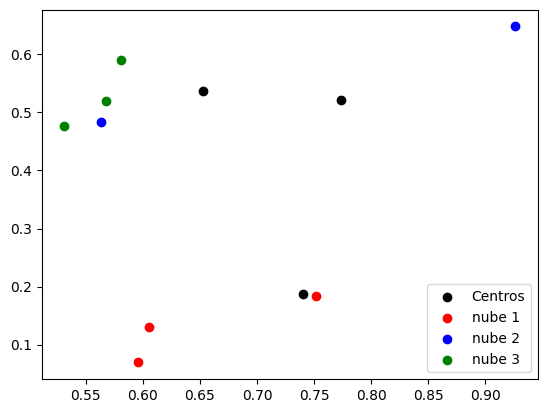

In [15]:
# 1.1)
# Centros
c = np.random.rand(3,2)

# Nubes
sigma = 0.1
n1 = sigma * np.random.randn(3,2) + c[0]
n2 = sigma * np.random.randn(2,2) + c[1]
n3 = sigma * np.random.randn(3,2) + c[2]

# Grafico de los puntos
plt.scatter(c[:,0],c[:,1],color='black', label='Centros')  # centros
plt.scatter(n1[:,0],n1[:,1],color='red', label='nube 1')   # nube de centro 1
plt.scatter(n2[:,0],n2[:,1],color='blue', label='nube 2')  # nube de centro 2
plt.scatter(n3[:,0],n3[:,1],color='green', label='nube 3') # nube de centro 3
plt.legend()
plt.show()


**IMPORTANTE:** No olvide extender la entrada con una unidad extra de estado fijo $x_{n_e+1}=-1$ para que las sinapsis $w_{j,n_e+1}$ hagan las veces de umbrales $u_j$.

## **Ejercicio 2**

Implemente y entrene un **perceptrón monocapa** sobre el conjunto de entrenamiento generado en el Ejercicio 1.
Utilice funciones de activación **sigmoideas** y, además, recuerde agregar las neuronas auxiliares que permiten imitar los umbrales de activación.

Para entrenarlo, utilice una taza $\eta=0.02$ y alrededor de 500.000 de épocas o más, según considere necesario.

Luego, grafique nuevamente los puntos, pintando el relleno de los mismos con los colores de las nubes asociadas, y el borde de los mismos con el color correspondiente a la predicción.
Grafique, además, las predicciones antes de entrar con el fin de corroborar que la red sin entregar clasifica erroneamente los ejemplos.

In [16]:
# 2)
# Armo mi dataset de entrenamiento
input_set = np.concatenate((n1,n2,n3),axis=0)
output_set = np.array([[1,0,0], [1,0,0], [1,0,0], [0,1,0], [0,1,0], [0,0,1], [0,0,1], [0,0,1]])
data_set = np.concatenate((input_set,output_set),axis=1)

In [17]:
def train_perceptron(input_set, output_set, training_rate, g_function, dg_function, w=None, epochs=10000):
    """ 
        input_set: conjunto de entrenamiento de entrada
        output_set: datos de salida esperados para cada vector de entrenamiento
        training_rate: tasa de aprendizaje
        g_function: funcion de activacion
        dg_function: derivada de la funcion de activacion
        w: matriz de pesos de la red epochs: cantidad de epocas de entrenamiento

        Entrena la red neuronal con el algoritmo de aprendizaje del perceptron simple por medio de descenso de gradiente, actualizando los pesos luego de cada epoca de entrenamiento. 

        Los datos de entrada incluyen una columna extra con el valor -1, que corresponde al umbral de la red.
    """
    n_s = output_set.shape[1] # cantidad de neuronas de salida
    n_e = input_set.shape[1] # cantidad de neuronas de entrada
    training_set_size = input_set.shape[0] # cantidad de vectores de entrenamiento

    if w is None:
        w = np.random.normal(0, 1, (n_e,n_s)).T # inicializo los pesos de la red
        
    delta_w = np.zeros((n_s, n_e)) # inicializo el delta de aprendizaje
    ecm = [] # lista para guardar el error cuadratico medio en cada epoca
    for _ in range(epochs):
        delta_w.fill(0)
        ecm_epoch = 0
        for m in range(training_set_size):
            h_m = np.dot(w, input_set[m]) # calculo la suma ponderada de las entradas
            O_m = g_function(h_m) # salida de la red
            delta_w += np.outer(dg_function(h_m) * (output_set[m] - O_m), input_set[m])  # calculo el delta de aprendizaje
            ecm_epoch += np.sum((O_m - output_set[m])**2)
        # finalizo epoca, actualizo los pesos.
        w += training_rate * delta_w
        ecm.append(0.5 * ecm_epoch)
    return w, ecm


In [18]:
sigmoide = lambda x: 1 / (1 + np.exp(-x))
d_sigmoide = lambda x: sigmoide(x) * (1 - sigmoide(x))

In [22]:
def evaluate(g_function, w, input_set):
    """
        g_function: funcion de activacion
        w: matriz de pesos de la red
        input_set: conjunto de datos de entrada

        Evalua la red neuronal con los datos de entrada y devuelve la salida de la red.
    """
    return g_function(np.dot(input_set, w.T))

In [ ]:
w, ecm = train_perceptron(input_set, output_set, 0.02, sigmoide, np.vectorize(d_sigmoide), epochs=100000)

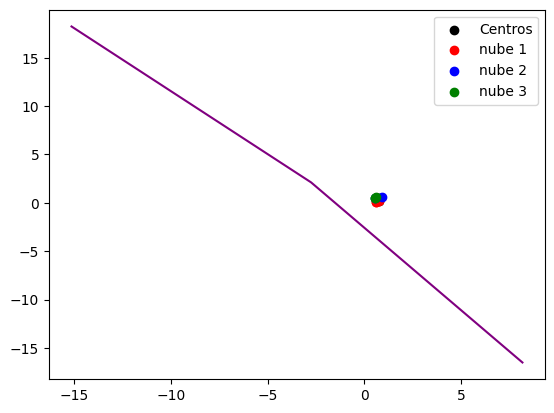

In [ ]:
# Grafico del W
plt.scatter(c[:,0],c[:,1],color='black', label='Centros')  # centros
plt.scatter(n1[:,0],n1[:,1],color='red', label='nube 1')   # nube de centro 1
plt.scatter(n2[:,0],n2[:,1],color='blue', label='nube 2')  # nube de centro 2
plt.scatter(n3[:,0],n3[:,1],color='green', label='nube 3') # nube de centro 3
plt.legend()
plt.plot(w_ej2[:,0],w_ej2[:,1],color='purple', label='W')
plt.show()

## **Ejercicio 3**

La compuerta XOR.

El siguiente conjunto de 4 ejemplos:

* $e_1 = (0,0,-1)$, $s_1=(1,0)$
* $e_2 = (0,1,-1)$, $s_2=(0,1)$
* $e_3 = (1,0,-1)$, $s_3=(0,1)$
* $e_4 = (1,1,-1)$, $s_4=(1,0)$

corresponde a la compuerta XOR.
Utilice el **perceptrón monocapa** implementando para verificar que el mismo no es capáz de aprender este conjunto de ejemplos.

## **Ejercicio 4**

Repita los experimentos utilizando funciones de activación de tipo **ReLU**.